In [1]:
from neural_stylization.img_util import load_image, image_to_matrix, normalize

Using TensorFlow backend.


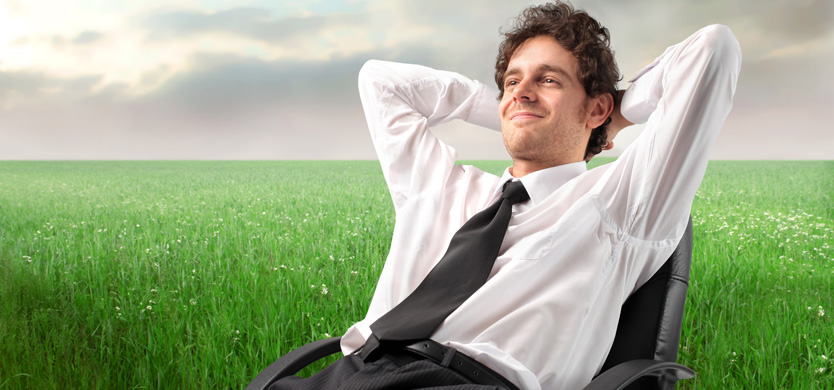

In [2]:
content = load_image('img/content/stock.jpg')
content

In [3]:
content = normalize(image_to_matrix(content))

In [4]:
content.shape

(1, 390, 834, 3)

In [5]:
height = content.shape[1]
width = content.shape[2]

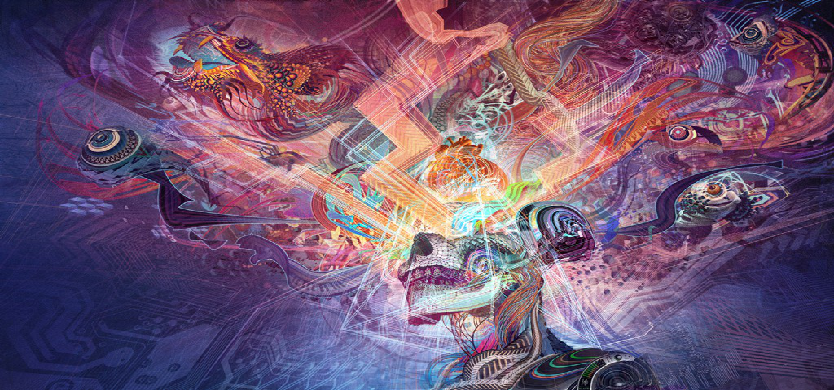

In [7]:
style = load_image('img/styles/android-jones-tipper.jpg', (width, height))
style

In [8]:
style = normalize(image_to_matrix(style))

In [9]:
from keras import backend

In [10]:
# load the variables into keras
content_image = backend.variable(content)
style_image = backend.variable(style)
combination_image = backend.placeholder((1, height, width, 3))

In [11]:
# concatentate the images into a single tensor
input_tensor = backend.concatenate([content_image,
                                    style_image,
                                    combination_image], axis=0)

In [12]:
from neural_stylization.vgg19 import VGG_19

In [14]:
model = VGG_19(input_tensor=input_tensor, include_top=False)
model

VGG_19(include_top=False, weights=imagenet, input_tensor=Tensor("concat:0", shape=(3, 390, 834, 3), dtype=float32), input_shape=None, pooling=None, classes=1000)

In [15]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'block1_conv1': <tf.Tensor 'block1_conv1_1/Relu:0' shape=(3, 390, 834, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2_1/Relu:0' shape=(3, 390, 834, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool_1/MaxPool:0' shape=(3, 195, 417, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1_1/Relu:0' shape=(3, 195, 417, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2_1/Relu:0' shape=(3, 195, 417, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool_1/MaxPool:0' shape=(3, 97, 208, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1_1/Relu:0' shape=(3, 97, 208, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2_1/Relu:0' shape=(3, 97, 208, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3_1/Relu:0' shape=(3, 97, 208, 256) dtype=float32>,
 'block3_conv4': <tf.Tensor 'block3_conv4_1/Relu:0' shape=(3, 97, 208, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool_1/MaxPool:0' shape=(3, 48, 104, 256)